# Assignment 1: Izhikevich’s model

1. The assignment consists of the following points:

2. Implement the Izhikevich’s model in Matlab
Develop all the 20 neuro-computational features of biological neurons using the model developed at point 1) and plot: 
    - the resulting membrane potential’s time courses into individual figures (one figure for each neuro-computational feature);
    - the phase portraits that correspond to each of the neuro-computational features (one figure for each neuro-computational feature).

## Main Functions

In [16]:
import numpy
import matplotlib.pyplot as plt

# functions 'f' and 'g' are written separated for code elegance

def du_dt(u:float, w:float, I:float):
    # compute the derivative of the membrane potential

    return 0.04 * (u**2) + 5*u + 140 - w + I

def dw_dt(u:float, w:float, a:float, b:float):
    # compute the derivative of the recovery variable

    return a*(b*u - w)

def Izhikevich(u:float, w:float, 
               a:float, b:float, c:float, d:float, 
               I:numpy.ndarray, time_steps:numpy.ndarray, h:float,
               f:callable = du_dt, g:callable = dw_dt):
    
    '''
        Compute the discretize version of Izhikevich

        Parameters
        ---------
        u: float
            current membrane potential value 
        w: float
            current recovery variable value
        a: float
            time scale of the recovery variable
        b: float
            sensitivity of the recovery variable to flutuations of the membrane potential
        c: float
            after-spike reset value of the membrane potential
        d: float
            after-spike reset of the recovery variable
        I: numpy array
            values of the current input over time
        time_steps: numpy array
            the time steps to consider during the iteration
        h: float
            time step (used for the Leap-Frog method)

        Returns
        -------
        return: the membrane potential and recovery variable values over time

    '''

    u_values = []
    w_values = []

    for i, _ in enumerate(time_steps):
        # application of Leap-Forg method
        u = u + h * f(u, w, I[i])
        w = w + h * g(u, w, a, b)

        if u >= 30:
            u_values.append(30)
            u = c
            w = w + d
        else:
            u_values.append(u)

        w_values.append(w)

    return u_values, w_values

#TODO: show better input current
def show_charts(u_values:list, w_values:list, I: numpy.array, time_steps:list):
    '''
        simply shows the membrane dynamics and the phase portrait plots

        Parameters
        ---------
        u_values: list
            membrane potential's values over time
        w_values: list
            recovery variable's values over time
        I: numpy array
            values of the current input over time
        time_steps: numpy array
            the time steps to consider during the iteration

        Returns
        -------
        return: the membrane potential and recovery variable values over time

    '''

    fig, ax = plt.subplots(1,2, figsize=(20,5))

    ax[0].set_xlabel("Time (t)")
    ax[0].set_ylabel("Membrane potential (u)")
    ax[0].set_title("Membrane dynamics")

    ax[1].set_xlabel("Membrane potential (u)")
    ax[1].set_ylabel("Recovery variable (w)")
    ax[1].set_title("Phase portrait")

    ax[0].plot(time_steps, u_values)
    ax[0].plot(time_steps, I) # I is the input current
    ax[1].plot(u_values, w_values)

## Tonic Spiking (A)

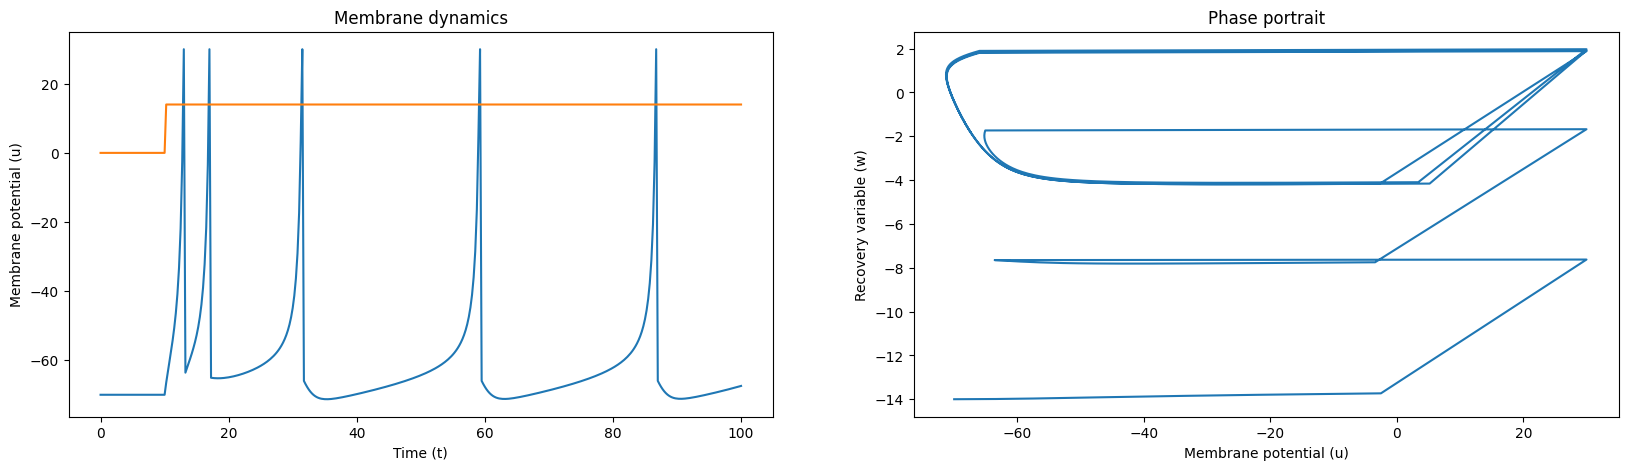

In [3]:
a = 0.02
b = 0.2
c = -65
d = 6
u = -70  # Initial membrane potential
w = b * u  # Initial recovery variable
tau = 0.25  # Time step
tspan = numpy.arange(0, 100 + tau, tau)  # Time span
T1 = tspan[-1] / 10  # Time after which the input current changes

condition = lambda t: (t > T1)
I = [14 if condition(t) else 0 for t in tspan]

u_v, w_v = Izhikevich(u, w, a, b, c, d, I, tspan, tau)
show_charts(u_v, w_v, I, tspan)

## Phasic Spiking (B)

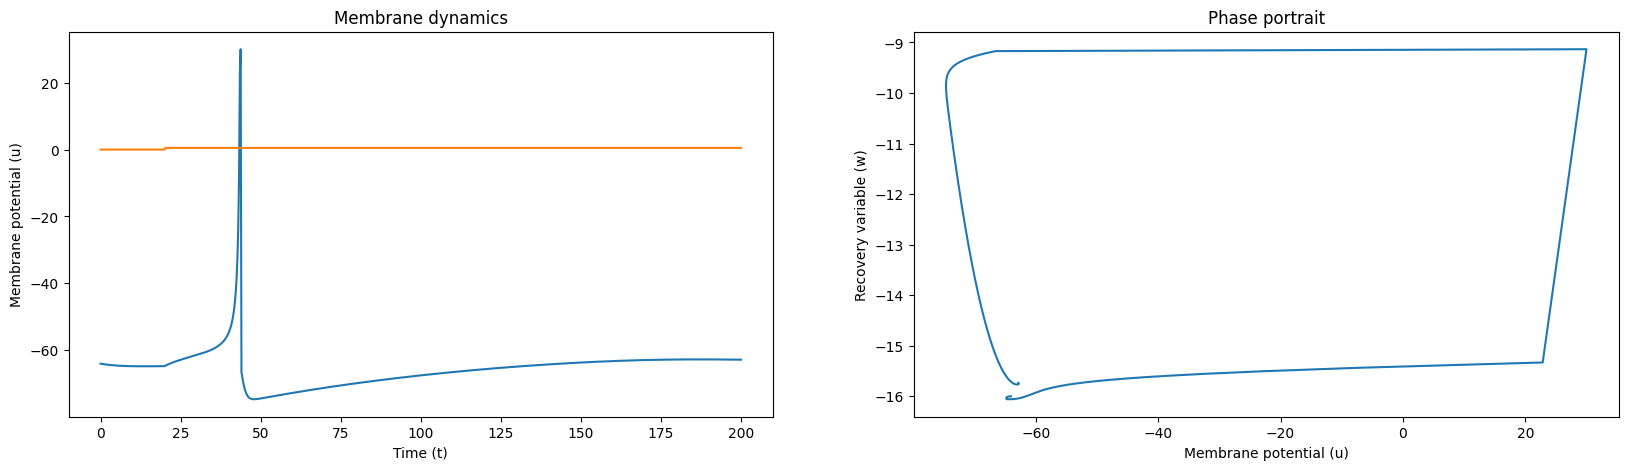

In [4]:
a = 0.02
b = 0.25
c = -65
d = 6
u = -64  # Initial membrane potential
w = b * u  # Initial recovery variable
tau = 0.25  # Time step
tspan = numpy.arange(0, 200 + tau, tau)  # Time span
T1 = 20  # Time after which the input current changes

condition = lambda t: (t > T1)
I = [0.5 if condition(t) else 0 for t in tspan]

u_v, w_v = Izhikevich(u, w, a, b, c, d, I, tspan, tau)
show_charts(u_v, w_v, I, tspan)

## Tonic Bursting (C)

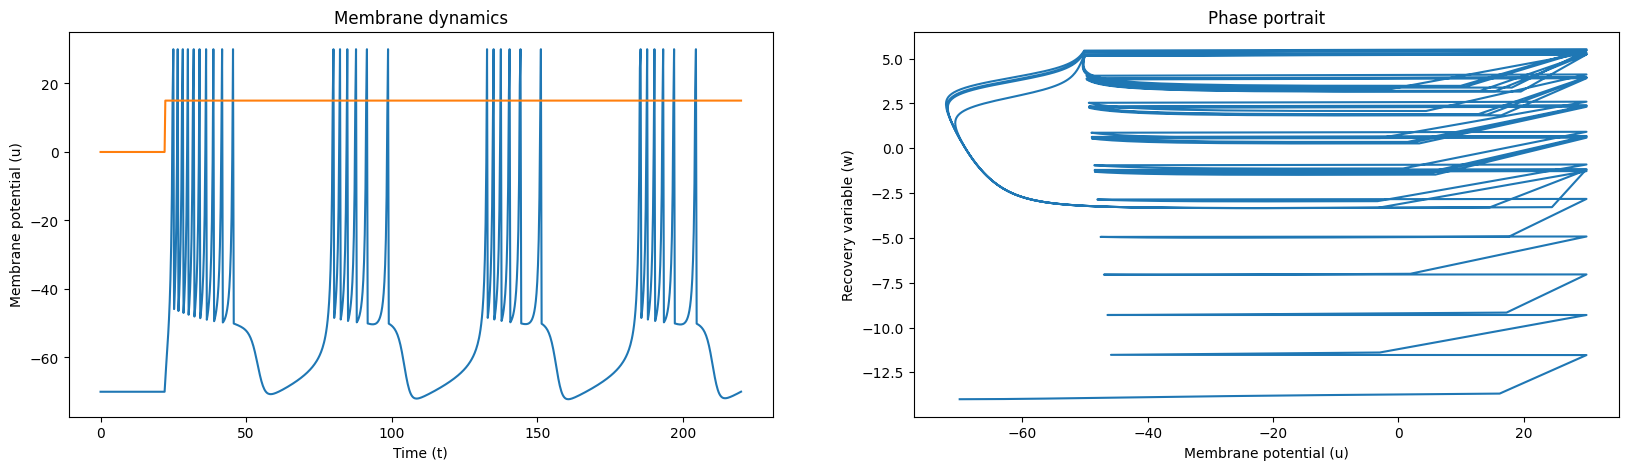

In [5]:
a = 0.02
b = 0.2
c = -50
d = 2
u = -70  # Initial membrane potential
w = b * u  # Initial recovery variable
tau = 0.25  # Time step
tspan = numpy.arange(0, 220 + tau, tau)  # Time span
T1 = 22  # Time after which the input current changes

condition = lambda t: (t > T1)
I = [15 if condition(t) else 0 for t in tspan]

u_v, w_v = Izhikevich(u, w, a, b, c, d, I, tspan, tau)
show_charts(u_v, w_v, I, tspan)

## Phasic Bursting (D)

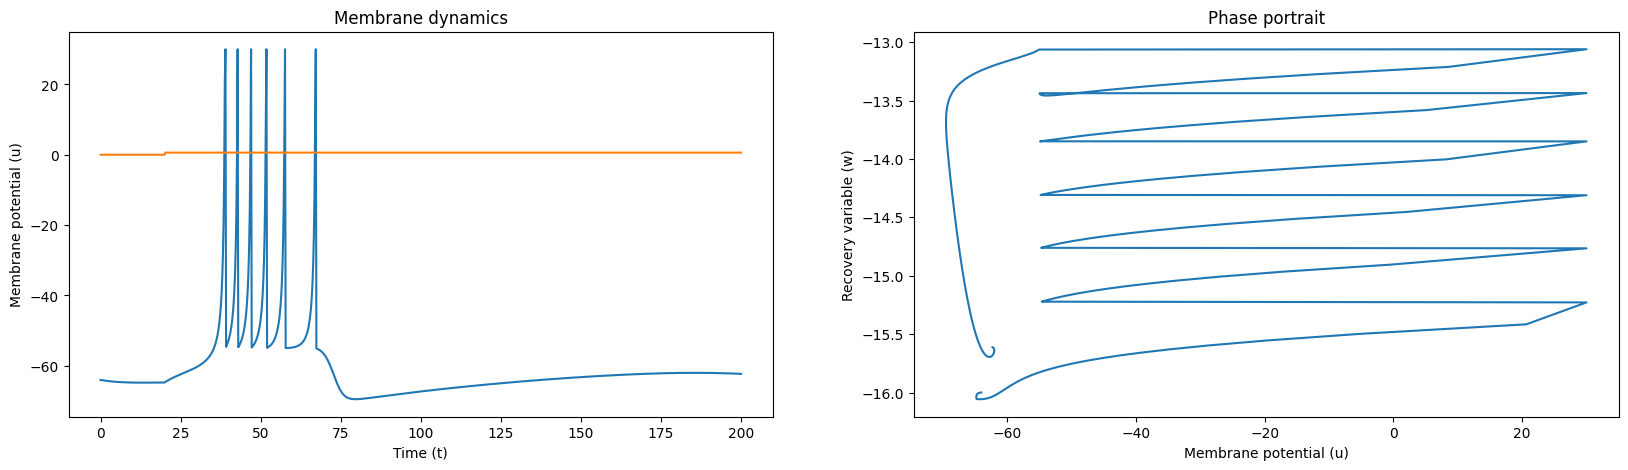

In [6]:
a = 0.02
b = 0.25
c = -55
d = 0.05
u = -64  # Initial membrane potential
w = b * u  # Initial recovery variable
tau = 0.2  # Time step
tspan = numpy.arange(0, 200 + tau, tau)  # Time span
T1 = 20  # Time after which the input current changes

condition = lambda t: (t > T1)
I = [0.6 if condition(t) else 0 for t in tspan]

u_v, w_v = Izhikevich(u, w, a, b, c, d, I, tspan, tau)
show_charts(u_v, w_v, I, tspan)

## Mixed Mode (E)

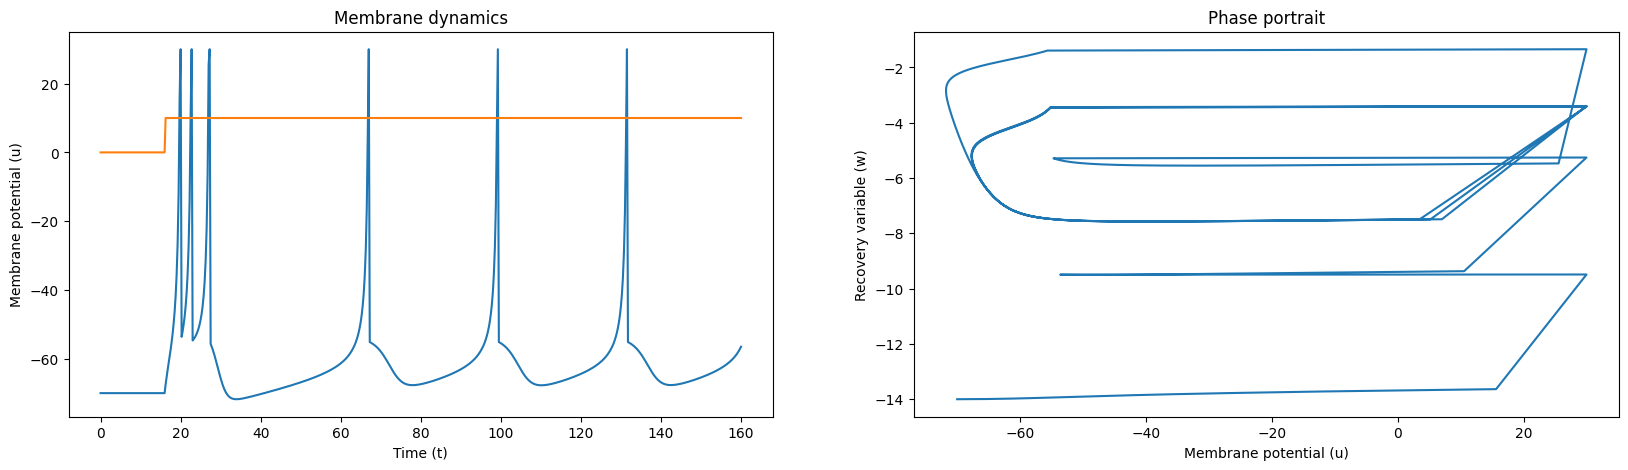

In [7]:
a = 0.02
b = 0.2
c = -55
d = 4
u = -70  # Initial membrane potential
w = b * u  # Initial recovery variable
tau = 0.25  # Time step
tspan = numpy.arange(0, 160 + tau, tau)  # Time span
T1 = tspan[-1] / 10  # Time after which the input current changes

condition = lambda t: (t > T1)
I = [10 if condition(t) else 0 for t in tspan]

u_v, w_v = Izhikevich(u, w, a, b, c, d, I, tspan, tau)
show_charts(u_v, w_v, I, tspan)

## Spike Frequency Adaptation (F)

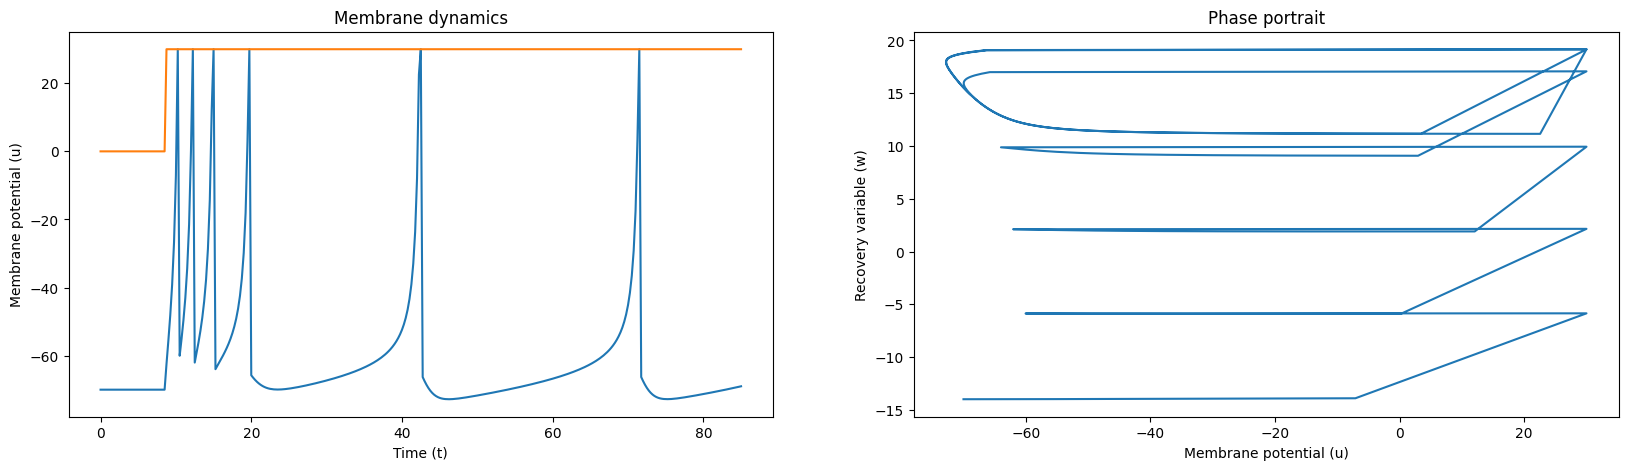

In [8]:
a = 0.01
b = 0.2
c = -65
d = 8
u = -70  # Initial membrane potential
w = b * u  # Initial recovery variable
tau = 0.25  # Time step
tspan = numpy.arange(0, 85 + tau, tau)  # Time span
T1 = tspan[-1] / 10  # Time after which the input current changes

condition = lambda t: (t > T1)
I = [30 if condition(t) else 0 for t in tspan]

u_v, w_v = Izhikevich(u, w, a, b, c, d, I, tspan, tau)
show_charts(u_v, w_v, I, tspan)

## Class 1 Excitable (G)

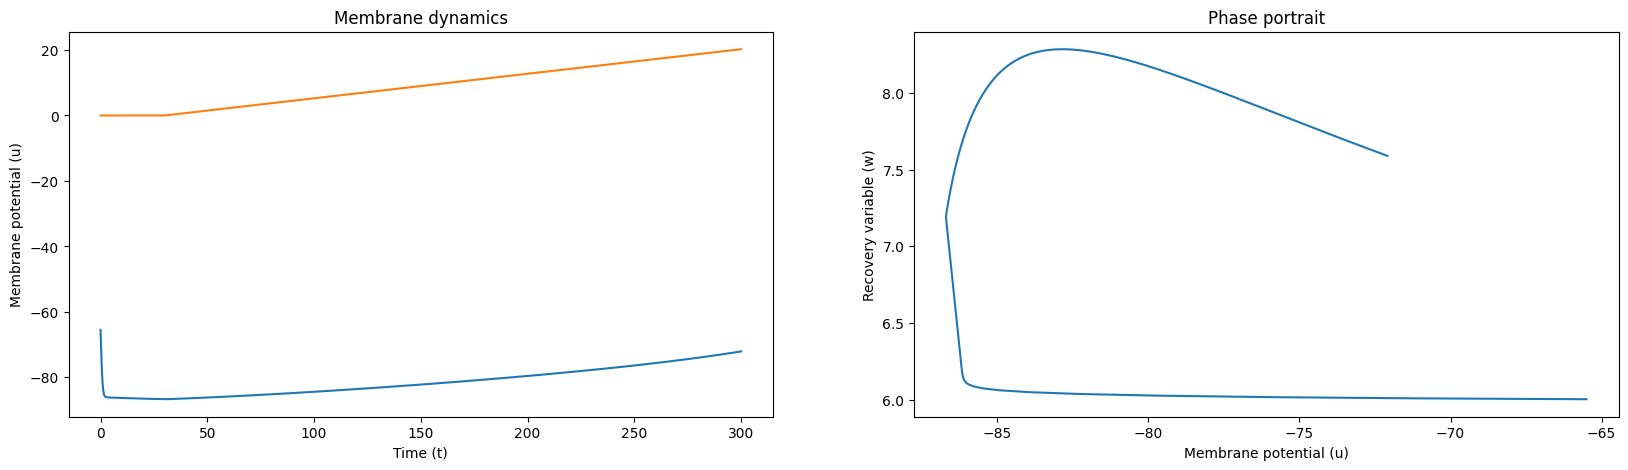

In [9]:
a = 0.02 #TODO: change value of 'f' and 'g' for this class 1 excitable
b = -0.1
c = -55
d = 6
u = -60  # Initial membrane potential
w = b * u  # Initial recovery variable
tau = 0.25  # Time step
tspan = numpy.arange(0, 300 + tau, tau)  # Time span
T1 = 30  # Time after which the input current changes

condition = lambda t: (t > T1)
I = [(0.075 * (t - T1)) if condition(t) else 0 for t in tspan]

u_v, w_v = Izhikevich(u, w, a, b, c, d, I, tspan, tau)
show_charts(u_v, w_v, I, tspan)

## Class 2 excitable (H)

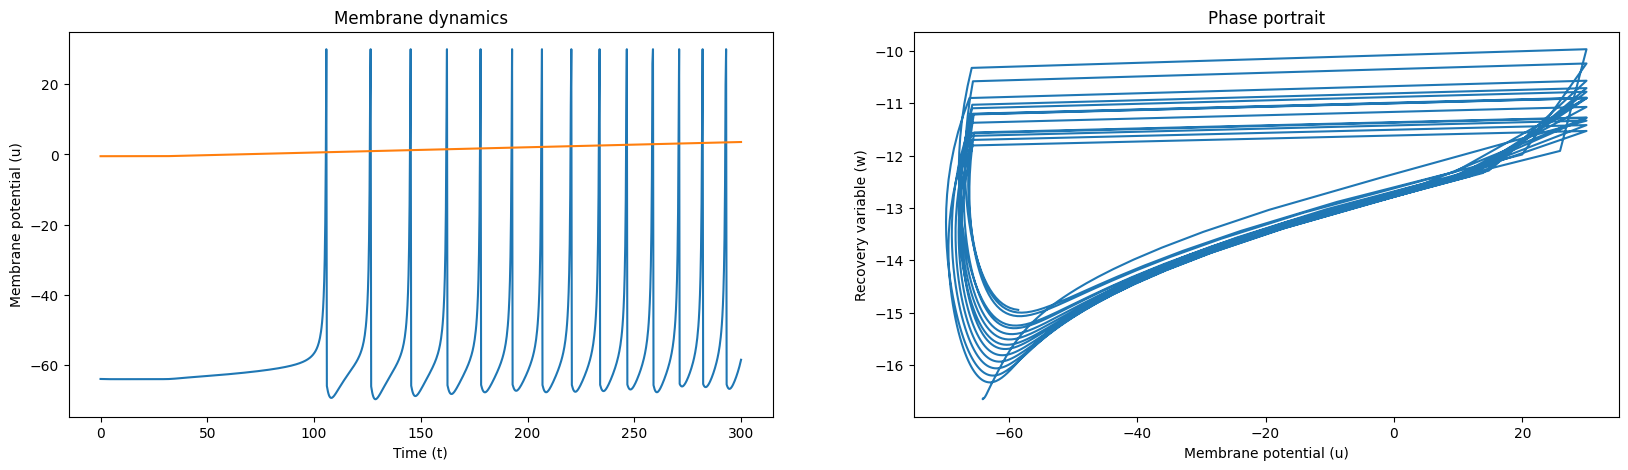

In [10]:
a = 0.2
b = 0.26
c = -65
d = 0
u = -64  # Initial membrane potential
w = b * u  # Initial recovery variable
tau = 0.25  # Time step
tspan = numpy.arange(0, 300 + tau, tau)  # Time span
T1 = 30  # Time after which the input current changes

condition = lambda t: (t > T1)
I = [(-0.5 + 0.015 * (t - T1)) if condition(t) else -0.5 for t in tspan]

u_v, w_v = Izhikevich(u, w, a, b, c, d, I, tspan, tau)
show_charts(u_v, w_v, I, tspan)

## Spike Latency (I)

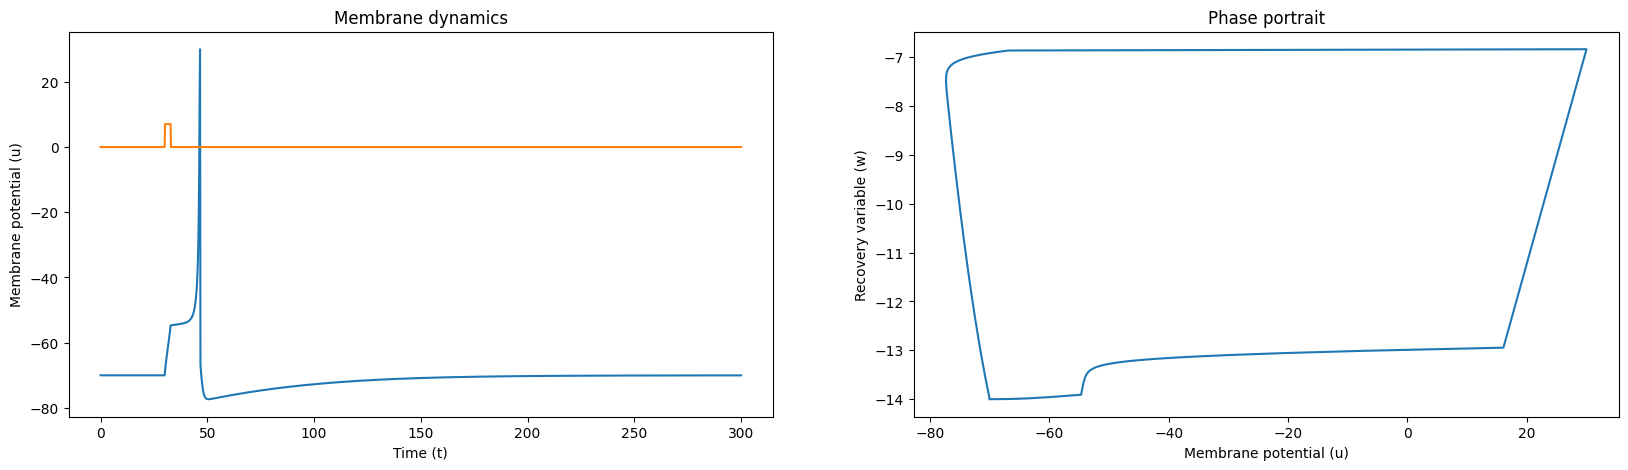

In [15]:
a = 0.02
b = 0.2
c = -65
d = 6
u = -70  # Initial membrane potential
w = b * u  # Initial recovery variable
tau = 0.2  # Time step
tspan = numpy.arange(0, 300 + tau, tau)  # Time span
T1 = 30  # Time after which the input current changes

condition = lambda t: (t > T1 and t < T1+3)
I = [7.04 if condition(t) else 0 for t in tspan]

u_v, w_v = Izhikevich(u, w, a, b, c, d, I, tspan, tau)
show_charts(u_v, w_v, I, tspan)

## Subthreshold Oscillations (J)

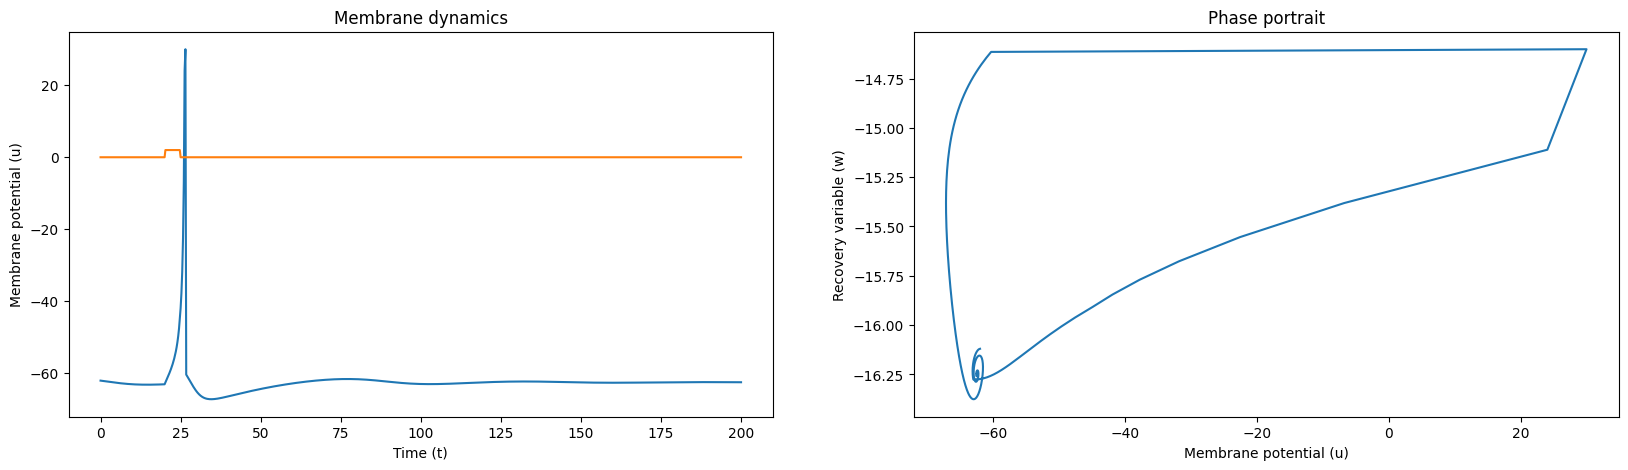

In [17]:
a = 0.05
b = 0.26
c = -60
d = 0
u = -62  # Initial membrane potential
w = b * u  # Initial recovery variable
tau = 0.25  # Time step
tspan = numpy.arange(0, 200 + tau, tau)  # Time span
T1 = tspan[-1] / 10  # Time after which the input current changes

condition = lambda t: (t > T1 and t < T1+5)
I = [2 if condition(t) else 0 for t in tspan]

u_v, w_v = Izhikevich(u, w, a, b, c, d, I, tspan, tau)
show_charts(u_v, w_v, I, tspan)

## Bistability (P)

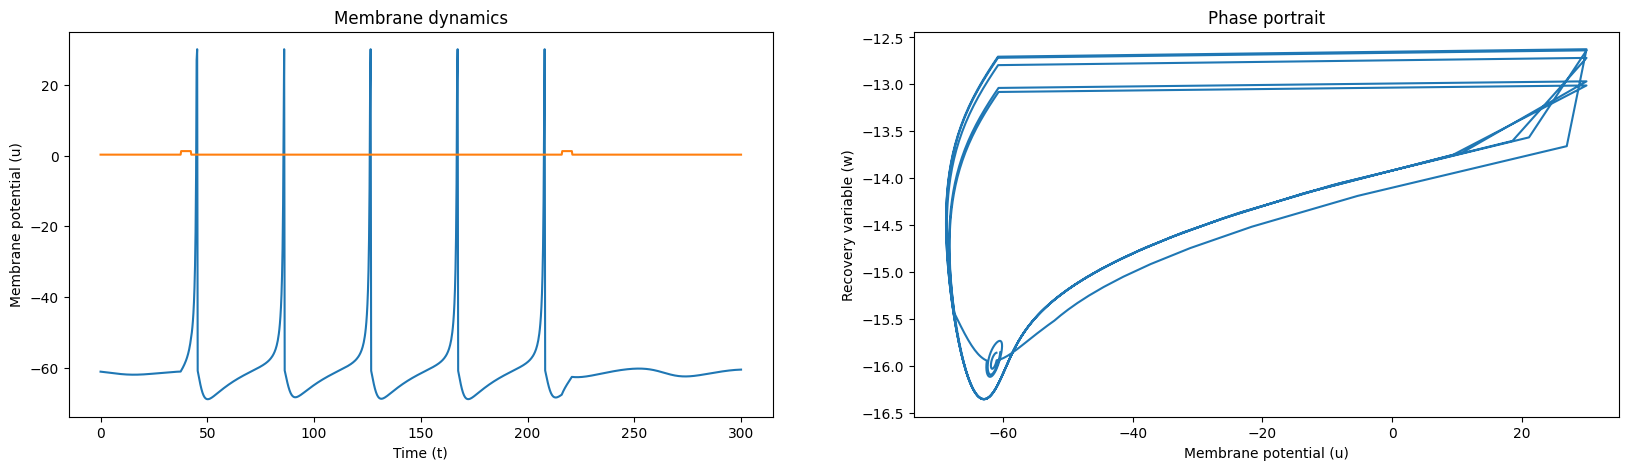

In [11]:
a = 0.1
b = 0.26
c = -60
d = 0
u = -61  # Initial membrane potential
w = b * u  # Initial recovery variable
tau = 0.25  # Time step
tspan = numpy.arange(0, 300 + tau, tau)  # Time span
T1 = tspan[-1]/8
T2 = 216

condition = lambda t: ((t > T1) and (t < T1 + 5)) or ((t > T2) and (t < T2 + 5))
I = [1.24 if condition(t) else 0.24 for t in tspan]

u_v, w_v = Izhikevich(u, w, a, b, c, d, I, tspan, tau)
show_charts(u_v, w_v, I, tspan)